In [1]:
pip install tensorflow --user

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_image,train_lables),(test_image,test_labels)=fashion_mnist.load_data()

In [4]:
train_image.shape

(60000, 28, 28)

In [5]:
test_image.shape

(10000, 28, 28)

In [6]:
train_image[0].shape

(28, 28)

In [7]:
train_lables[10]

0

In [8]:
classes=['T_shirt/top','Trouser','Pullover','Dress','Coat','Sandal','shirt','Sneaker','Bag','Ankle boot']

In [9]:
classes[train_lables[10]]

'T_shirt/top'

In [10]:
train_lables[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

In [11]:
train_image.max(),train_image.min()

(255, 0)

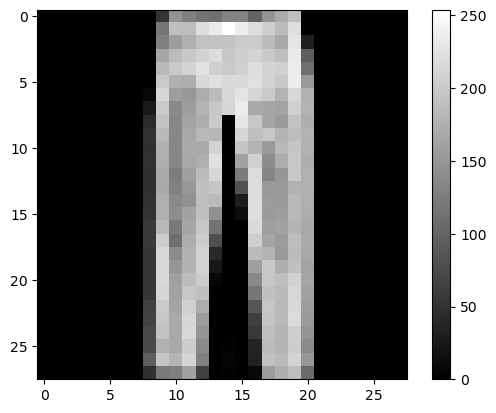

In [12]:
plt.figure()
plt.imshow(train_image[16],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

## Normalize

In [14]:
train_image=train_image/255
test_image=test_image/255

In [15]:
train_image.max()

1.0

In [16]:
train_image.min()

0.0

## Defining Architecture

In [20]:
from keras.models import Sequential
from keras.layers import Flatten,Dense

In [21]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
784*128+128

100480

In [24]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [25]:
model.fit(train_image,train_lables,epochs=100,verbose=1)

Epoch 1/100



C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



1875/1875 [==============================] - 11s 5ms/step - loss: 0.5012 - accuracy: 0.8246
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3815 - accuracy: 0.8616
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3396 - accuracy: 0.8760
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3133 - accuracy: 0.8846
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2980 - accuracy: 0.8901
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2828 - accuracy: 0.8959
Epoch 7/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2695 - accuracy: 0.8989
Epoch 8/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2591 - accuracy: 0.9029
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2501 - accuracy: 0.9072
Epoch 10/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.240

In [28]:
test_loss,test_acc=model.evaluate(test_image,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.7905 - accuracy: 0.8869


#### training acc is greater than testing acc hence model is overfitting

In [29]:
pred=model.predict(test_image)

313/313 [==============================] - 1s 2ms/step


In [30]:
pred[1]

array([6.9776063e-10, 0.0000000e+00, 1.0000000e+00, 3.8399377e-36,
       1.3009089e-08, 0.0000000e+00, 5.1989701e-11, 0.0000000e+00,
       6.7221930e-23, 0.0000000e+00], dtype=float32)

In [32]:
classes[np.argmax(pred[100])]

'Dress'

In [33]:
classes[test_labels[100]]

'Dress'

In [34]:
pred_lab=[classes[np.argmax(pred[i])] for i in range(100)]

In [35]:
test_lab=[classes[test_labels[i]] for i in range(100)]

In [36]:
z=list(zip(test_lab,pred_lab))

In [37]:
z

[('Ankle boot', 'Ankle boot'),
 ('Pullover', 'Pullover'),
 ('Trouser', 'Trouser'),
 ('Trouser', 'Trouser'),
 ('shirt', 'shirt'),
 ('Trouser', 'Trouser'),
 ('Coat', 'Coat'),
 ('shirt', 'shirt'),
 ('Sandal', 'Sandal'),
 ('Sneaker', 'Sneaker'),
 ('Coat', 'Coat'),
 ('Sandal', 'Sandal'),
 ('Sneaker', 'Sandal'),
 ('Dress', 'Dress'),
 ('Coat', 'Coat'),
 ('Trouser', 'Trouser'),
 ('Pullover', 'Pullover'),
 ('Coat', 'Pullover'),
 ('Bag', 'Bag'),
 ('T_shirt/top', 'T_shirt/top'),
 ('Pullover', 'Pullover'),
 ('Sandal', 'Sandal'),
 ('Sneaker', 'Sneaker'),
 ('Ankle boot', 'Sandal'),
 ('Trouser', 'Trouser'),
 ('Coat', 'Pullover'),
 ('shirt', 'shirt'),
 ('T_shirt/top', 'T_shirt/top'),
 ('Ankle boot', 'Ankle boot'),
 ('Dress', 'Coat'),
 ('Bag', 'Bag'),
 ('Bag', 'Bag'),
 ('Dress', 'Dress'),
 ('Dress', 'Dress'),
 ('Bag', 'Bag'),
 ('T_shirt/top', 'T_shirt/top'),
 ('Sneaker', 'Sneaker'),
 ('Sandal', 'Sandal'),
 ('Sneaker', 'Sneaker'),
 ('Ankle boot', 'Ankle boot'),
 ('shirt', 'T_shirt/top'),
 ('Trouser', 'T